# Data Analysis

In [2]:
from helper import *
import matplotlib.pyplot as plt

## Import data

In [3]:
# returns of load_csv_data function
"""
x_train (np.array): training data
x_test (np.array): test data
y_train (np.array): labels for training data in format (-1,1)
train_ids (np.array): ids of training data
test_ids (np.array): ids of test data
"""
# load data
x_train, x_test, y_train, train_ids, test_ids = load_csv_data(".\dataset_to_release", sub_sample=False)

In [4]:
# load feature headers
data_path = ".\dataset_to_release"
x_header = np.genfromtxt(
        os.path.join(data_path, "x_train.csv"), dtype=(str), delimiter=",", max_rows=1
    )[1:]

## Decision Tree

Implemented
* Filter features with too many NaN? (yes/no) ---yes---> apply threshold 
* Include continuous data? (yes/no) ---yes---> standardize
* Filter labels with too low counts? (yes/no) ---yes---> apply threshold

To-be-implemented
- PCA?
- Manual selection?


### Filter NaNs

In [16]:
# max_NaN_percentage gives the maximal NaN percentage per feature 
max_NaN_percentages = np.array([0.2, 0.6, 0.8])
max_NaN_counts = (max_NaN_percentages*x_train.shape[0]).astype(int)

In [61]:
# calculate number of NaNs per feature
num_NaNs_per_feature = [np.isnan(x_train[:, j]).sum() for j in range(x_train.shape[1])]

# calculate numer of NaNs per point
num_NaNs_per_point = [np.isnan(x_train[i, :]).sum() for i in range(x_train.shape[0])]

features_below_max_NaN_percentages = [num_NaNs_per_feature<max_NaN_count for max_NaN_count in max_NaN_counts] 
num_NaNs_per_point_and_percentage = [[np.isnan(x_train[i, :][features_below_max_NaN_percentage]).sum() for i in range(x_train.shape[0])] for features_below_max_NaN_percentage in features_below_max_NaN_percentages]

In [78]:
total_num_values = x_train.shape[0]*x_train.shape[1]
NaN_num_values = sum(num_NaNs_per_feature)
arr = np.array(num_NaNs_per_feature)
print("Of all", total_num_values, "values", str(round((NaN_num_values/total_num_values)*100.0, 1)) + "% are NaN values\n")
for ind, max_NaN_percentage in enumerate(max_NaN_percentages):
    print("Max NaN percentage for a feature:", str(int(max_NaN_percentage*100.0)) + "% --> Total percentage of NaN values:", 
          str(round((sum(arr[features_below_max_NaN_percentages[ind]])/total_num_values)*100.0, 1)) + "%")

Of all 105331335 values 44.8% are NaN values

Max NaN percentage for a feature: 20% --> Total percentage of NaN values: 0.9%
Max NaN percentage for a feature: 60% --> Total percentage of NaN values: 7.7%
Max NaN percentage for a feature: 80% --> Total percentage of NaN values: 10.5%


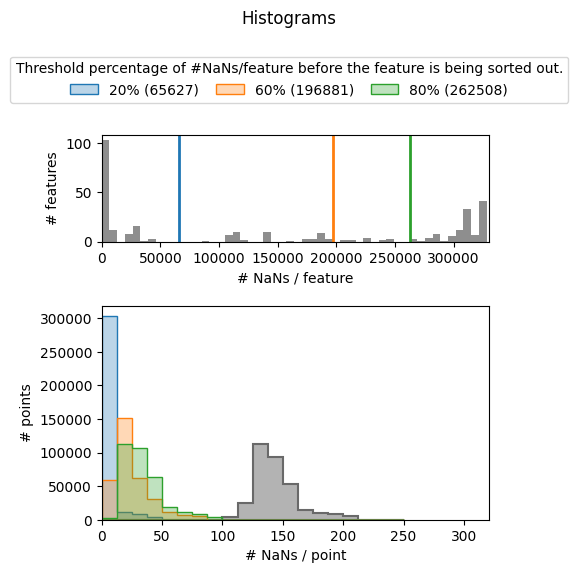

In [56]:
fig, axs = plt.subplots(2, height_ratios=[1, 2], figsize=(5,5))
plt.subplots_adjust(hspace=.4)
fig.suptitle('Histograms', y=1.13)

axs[0].hist(num_NaNs_per_feature, bins=50, color=("dimgray", 0.75))
axs[0].set_xlim([0, int(x_train.shape[0]*1.007)])
axs[0].set_xlabel('# NaNs / feature')
axs[0].set_ylabel('# features') 
for ind, max_num_NaN_per_feature in enumerate(max_NaN_counts):
    axs[0].axvline(max_num_NaN_per_feature, lw=2, color=plt.rcParams['axes.prop_cycle'].by_key()['color'][ind])

axs[1].hist(num_NaNs_per_point, 
                bins=20, 
                range=(0, 250), 
                color=('dimgray', 0.5), 
                histtype='stepfilled', 
                ec=('dimgray', 1.0), lw=1.5)
for ind, data in enumerate(num_NaNs_per_point_and_percentage):
    axs[1].hist(data, 
                bins=20, 
                range=(0, 250), 
                color=(plt.rcParams['axes.prop_cycle'].by_key()['color'][ind], 0.3), 
                histtype='stepfilled', 
                ec=(plt.rcParams['axes.prop_cycle'].by_key()['color'][ind], 1.0), 
                label= str(int(max_NaN_percentages[ind]*100.0))+"% (" + str(max_NaN_counts[ind]) + ")" )
    # alpha=1.0/(ind*.5+1.0)
axs[1].set_xlim([0, 321])
axs[1].set_xlabel('# NaNs / point')
axs[1].set_ylabel('# points')


lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncols=4, columnspacing=1.2, title="Threshold percentage of #NaNs/feature before the feature is being sorted out.")
# bbox_to_anchor=(0.85, 1.02, 0.2, 0.05), ncols=2, columnspacing=.5,
plt.show() 

### Filter Continuous

For logistic regression the continuous data needs to be standardized for example.

In [5]:
# check if any of the labels has a decimal place, 
# if this is the case, then the feature is classified as "continuous" and =0 is set,
# otherwise the feature is classified as "categorical" and =1 is set
isCategorical = np.array([all(x_train[:, j][~np.isnan(x_train[:, j])] % 1 == 0.0) for j in range(x_train.shape[1])])

In [81]:
print("Total # features:", len(isCategorical))
print("Categorical # features:", isCategorical.sum())
print("Continuous # features:", len(isCategorical)-isCategorical.sum())

Total # features: 321
Categorical # features: 297
Continuous # features: 24


<div class="alert alert-warning">
Standardization needs to be implemented.
</div>

In [84]:
# STANDARDIZE continuous data
removeContinuous = False
if (~removeContinuous):
    print()


### Filter Label Counts

In [7]:
# identify the labels per feature and their respective counts
labels = [np.unique(x_train[:,j], return_counts=True) for j in range(x_train.shape[1])]

# calculate the number of different labels per feature
num_labels = np.array([len(labels[i][0]) for i in range(len(labels))])

In [8]:
col = 10
print("Example for feature in column 10")
print("Header:", x_header[col])
print("Number labels:", num_labels[col])
print("Labels:", labels[col][0])
print("Label counts:", labels[col][1]) # counts = frequencies

Example for feature in column 10
Header: PVTRESD1
Number labels: 3
Labels: [ 1.  2. nan]
Label counts: [188688     32 139415]


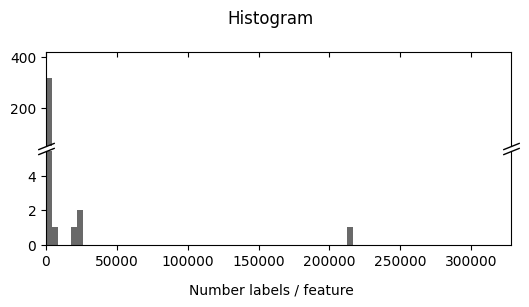

In [126]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,2.5))
fig.subplots_adjust(hspace=0.05) 

# plot the same data on both axes
ax1.hist(num_labels, bins=50, color="dimgray")
ax2.hist(num_labels, bins=50, color="dimgray")

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(50, 420)  # outliers only
ax2.set_ylim(0, 5.5)  # most of the data

ax1.set_xlim([0, int(x_train.shape[0])])
ax2.set_xlim([0, int(x_train.shape[0])])

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)

# ticks
ax1.xaxis.tick_top()
ax1.tick_params(axis='x', direction='in')
ax1.tick_params(labeltop=False) 
ax2.xaxis.tick_bottom()

d = .4  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

fig.supxlabel('Number labels / feature', fontsize='medium', y=-0.1)
fig.suptitle('Histogram', y=1.05)
plt.show()

In [144]:
# remove all the labels that appear at a lower percentage than the defined minimim percentage
label_min_percent = 0.25
label_min_count = int(x_train.shape[0]*label_min_percent*0.01) 
labels_filtered = [(labels[i][0][labels[i][1]>label_min_count], labels[i][1][labels[i][1]>label_min_count]) for i in range(len(labels))]

In [145]:
print("Example for feature in column 10 after filtering")
print("Minimum label percentage:", str(label_min_percent) + "%")
print("Mimimum label count: " + str(label_min_count) + " (" + str(label_min_percent) + "% of " + str(x_train.shape[0]) + " points)")
print("Header:", x_header[col])
print("Labels:", labels_filtered[col][0])
print("Label counts:", labels_filtered[col][1]) # counts = frequencies

Example for feature in column 10 after filtering
Minimum label percentage: 0.25%
Mimimum label count: 820 (0.25% of 328135 points)
Header: PVTRESD1
Labels: [ 1. nan]
Label counts: [188688 139415]


In [146]:
# calculate the number of filtered different labels per feature

# ONLY label threshold
num_labels_filtered_1 = np.array([len(labels_filtered[i][0]) for i in range(len(labels_filtered))])

# BOTH label threshold and isCategorical
num_labels_filtered_2 = np.array([len(labels_filtered[i][0]) for i in np.arange(len(labels_filtered))[isCategorical]])

In [147]:
print("Filtering using ONLY label count threshold. \nNumber labels:", num_labels_filtered_1.sum())
print("Filtering using BOTH label count threshold AND if categorical. \nNumber labels:", num_labels_filtered_2.sum())

Filtering using ONLY label count threshold. 
Number labels: 3470
Filtering using BOTH label count threshold AND if categorical. 
Number labels: 2409


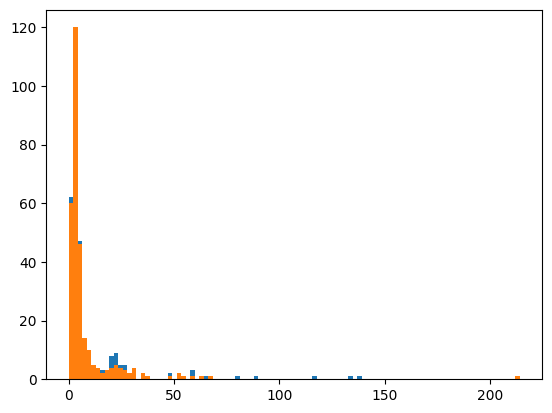

In [148]:
plt.hist(num_labels_filtered_1, bins=100)
plt.hist(num_labels_filtered_2, bins=100)
plt.show()